<div class="alert alert-block alert-info"> Pablo Laso Mielgo </div> 

### Plotting ODEs given the IMPLICIT solution and  ERROR

Plots contour, error (if y_exatc is explicit) and gradient field of an ODE
* takes as input: implicit solution and one set of ICs:
    - takes the x,y values for those given ICs and creates a level array
    - plots the gradient field (contour) for 20 levels and the specific levels (aforementioned) above it 

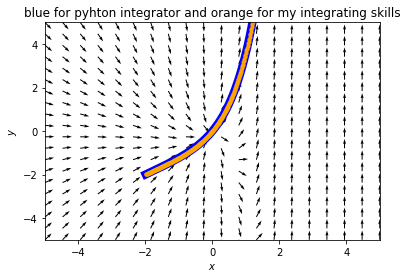

In [2]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (x[1])/x[0] + x[0] *np.exp(x[0])  ## <- Enter here the ODE as: dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[-2,-2]]
color=['blue']
listY = [] ## takes values for y_exact


for k in range(len(ic)): # creating y_exact
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 8.25)
    
    for elem in S[:,1]:
        listY.append(elem)
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-5,5,20),np.linspace(-5,5,20) )

V = Y/X + X *np.exp(X) ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

import math as m # Enter constant K if you want to solve for y_exact with ICs
def k(x,y):
    k = (y - x*np.exp(x))/x ## To check k's value with i.c
    return k

k_value = k(-2,-2) # enter ICs for y_exact


## plot y_exact: ANALYTICAL SOLUCION
xs = S[:,0]
y_exact = xs*np.exp(xs)+xs*k_value
plt.plot(xs, y_exact, ".", color = "orange")


##Limits of the graph
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title('blue for pyhton integrator and orange for my integrating skills')
plt.show()

### Plot ERROR
* you will need having solved for y_exact previously

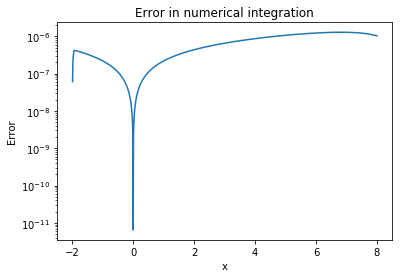

In [4]:
y_diff = np.abs(y_exact-listY)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");

### Plot CONTOUR

* you will need to solve for constant K

In [11]:
## k levels? ## Find k for some ICs
levels_solution = []
x,y= 2,0 # ICs
K1= -np.log(np.abs(np.sqrt(x**2 + y**2))) +np.arctan(y/x)
print('k1 value is',K1) 
levels_solution.append(K1)

## Levels we are interested to compare solution from gradient field
print(levels_solution)
levels=sorted(levels_solution)
print(levels) ## Ordenado para plotear las contour curves

('k1 value is', -0.6931471805599453)
[-0.6931471805599453]
[-0.6931471805599453]


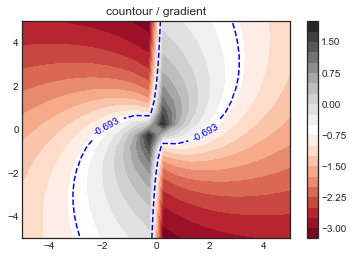

In [12]:
# use constant K as variable z for creating several planes
%matplotlib inline
plt.style.use('seaborn-white')

xs = np.linspace(-5, 5, 20)
ys = np.linspace(-5, 5, 20)

def fs(xs, ys):  ## y_exact equation without constant

    return -np.log(np.abs(np.sqrt(xs**2 + ys**2))) +np.arctan(ys/xs)

X, Y = np.meshgrid(xs, ys)
Z = fs(X,Y)
contours = plt.contour(X, Y, Z, levels, colors='blue')
plt.clabel(contours, inline=1, fontsize=10)

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.title('countour / gradient');